# **W09 Class Practice**
# Feylin Christelia - 0706022310012

## Import Library

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [123]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [124]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [125]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [126]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [ ]:
# drop Terjual/Belum karena hasilnya Belum semua
df = df.drop('Terjual/Belum', axis=1)

In [128]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

# Exploratory Data Analysis

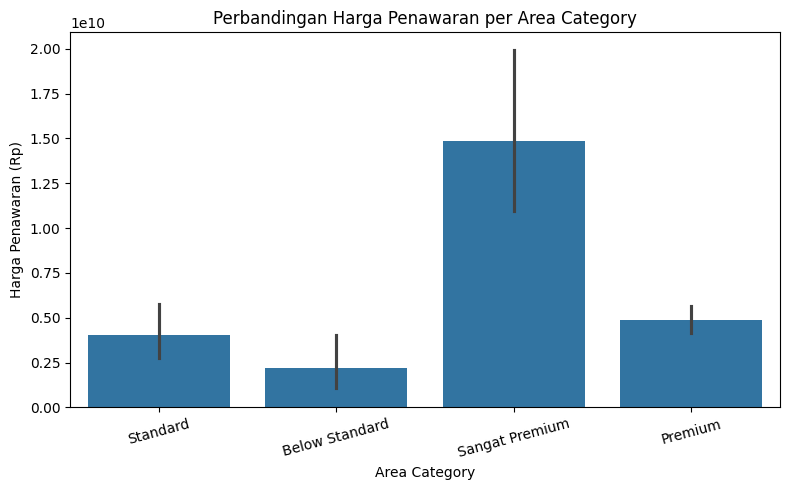

In [129]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Area Category", y="Harga Penawaran (dari Owner)", data=df)
plt.title("Perbandingan Harga Penawaran per Area Category")
plt.ylabel("Harga Penawaran (Rp)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Bar chart tersebut menjelaskan bahwa area category yang sangat premium memiliki harga penawaran tertinggi

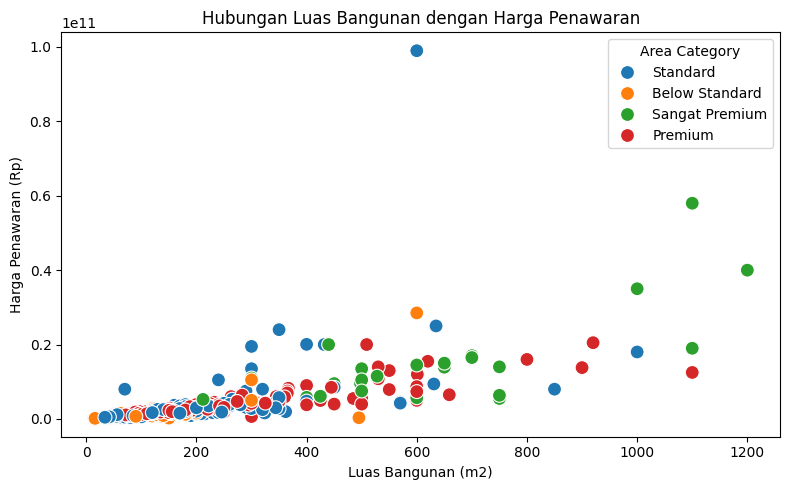

In [130]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Luas Bangunan (m2)", y="Harga Penawaran (dari Owner)", hue="Area Category", data=df, s=100)
plt.title("Hubungan Luas Bangunan dengan Harga Penawaran")
plt.xlabel("Luas Bangunan (m2)")
plt.ylabel("Harga Penawaran (Rp)")
plt.tight_layout()
plt.show()

Scatter plot tersebut menjelaskan bahwa terdapat korelasi positif antara luas bangunan dan harga penawaran. Kategori area memengaruhi posisi harga, dimana area premium cenderung menaikkan harga secara signifikan.

# Data Preparation for Clustering

In [131]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

# Daftar kolom yang ingin diencode
cols_to_encode = ['Area Category', 'Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# Encode semua kolom tersebut
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  

df.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,11,240,300,4,3,2,3500000000,3,2,0
1,0,100,30,60,2,1,2,287799000,3,2,1
2,3,48,170,170,5,4,2,2699999999,1,0,0
3,2,48,187,250,5,5,2,3100000000,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,2,0


In [132]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[[
    'Luas Tanah (m2)',
    'Luas Bangunan (m2)',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai ',
    'Harga Penawaran (dari Owner)'
]])

df_scaled = pd.DataFrame(df_scaled, columns=[
    'Luas Tanah (m2)',
    'Luas Bangunan (m2)',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai ',
    'Harga Penawaran (dari Owner)'
])
df_scaled.head()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [133]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

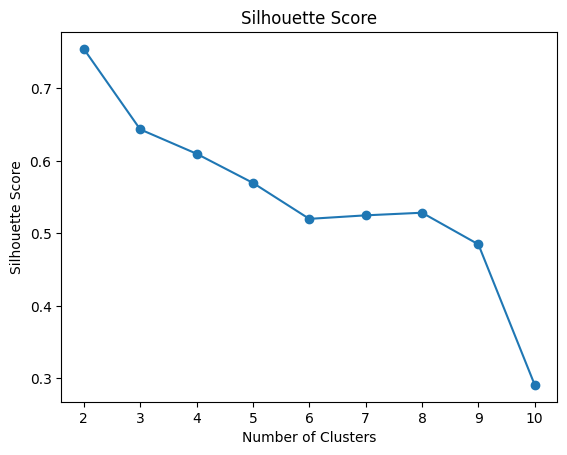

In [134]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


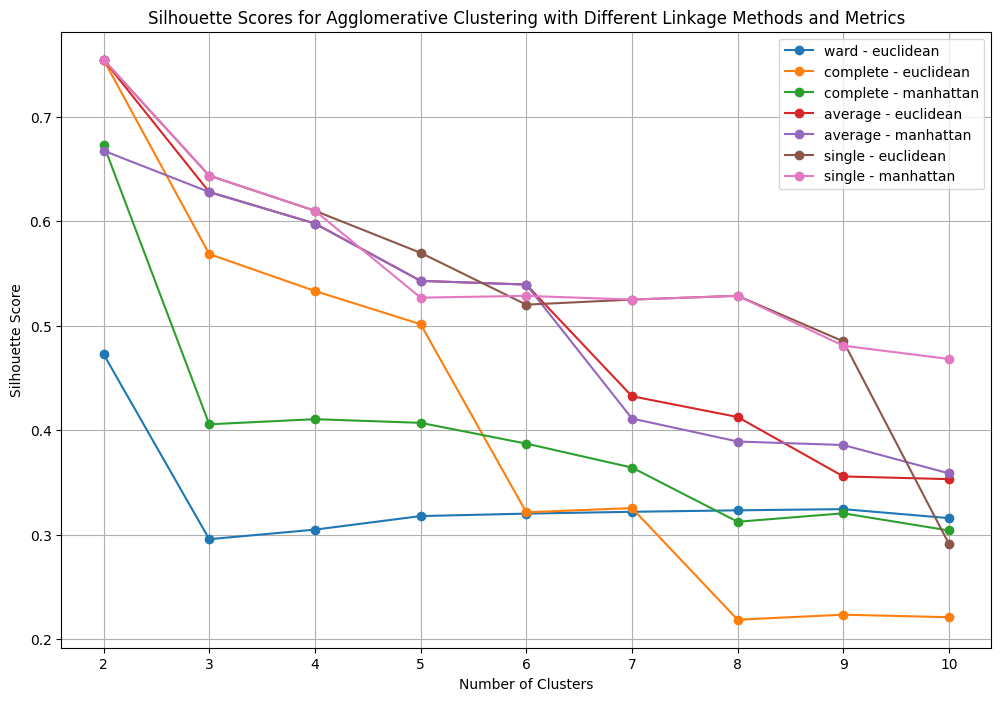

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [135]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

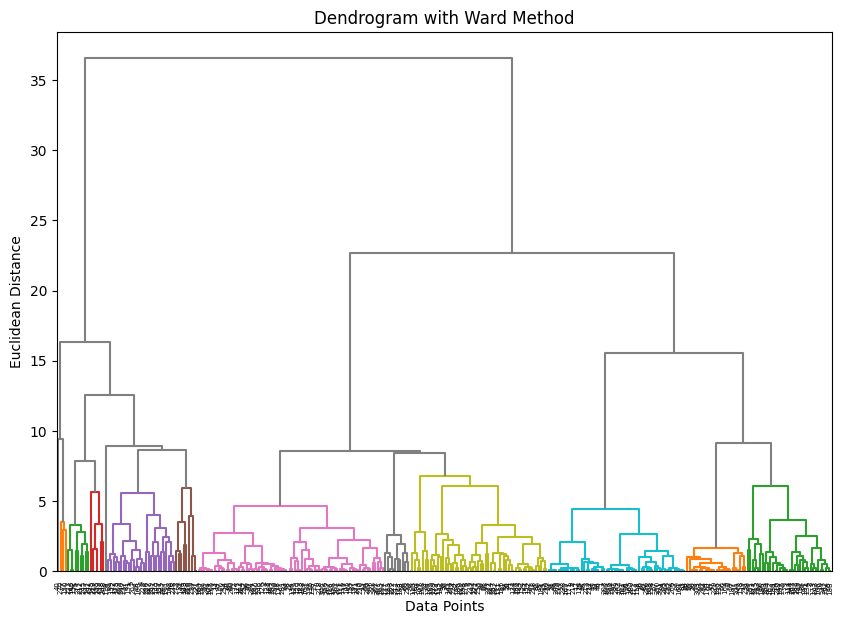

In [136]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

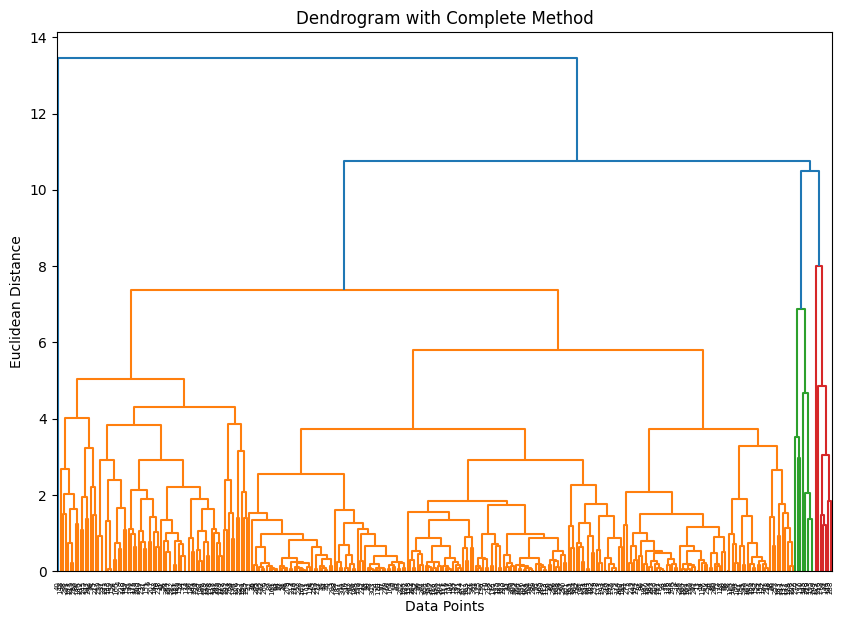

In [137]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

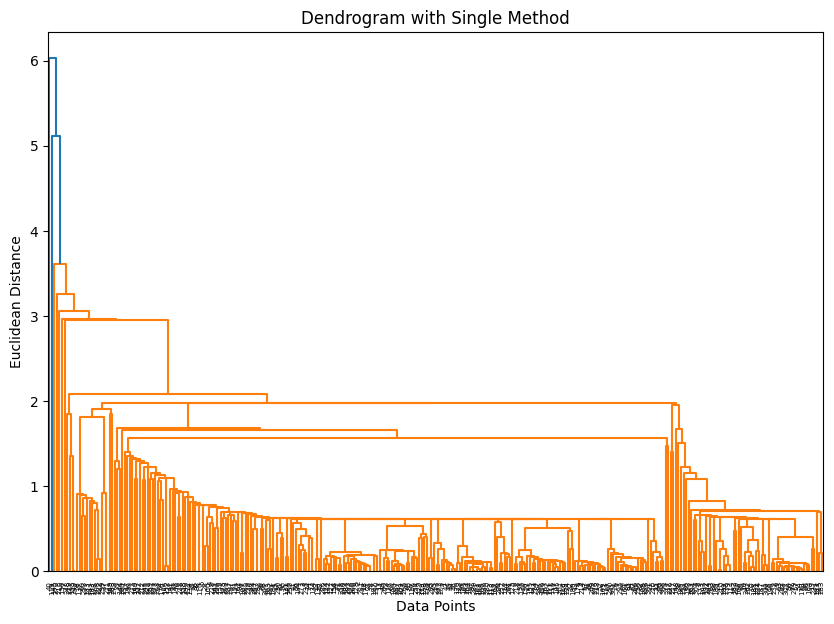

In [138]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

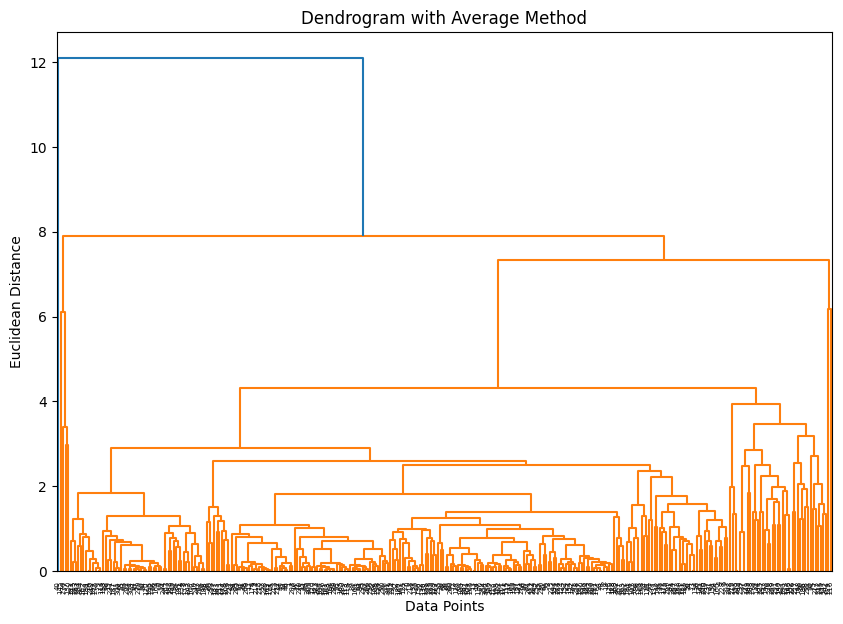

In [139]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Modeling

In [140]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [141]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


## Dendogram Visualization for Hierarchical Clustering Model

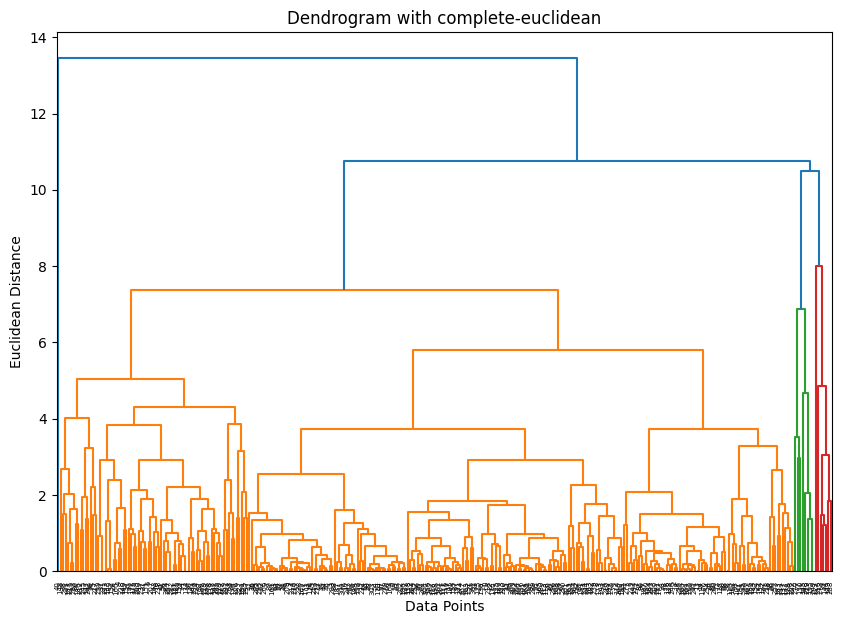

In [142]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)  
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [143]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,3,11,240,300,4,3,2,3500000000,3,2,0,0
1,0,100,30,60,2,1,2,287799000,3,2,1,0
2,3,48,170,170,5,4,2,2699999999,1,0,0,0
3,2,48,187,250,5,5,2,3100000000,3,2,0,0
4,1,48,350,600,5,5,2,5000000000,0,2,0,0


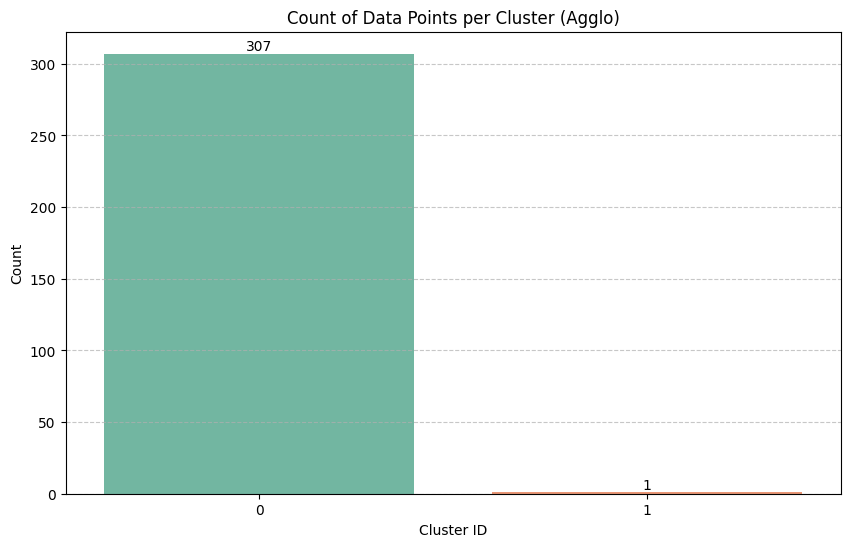

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

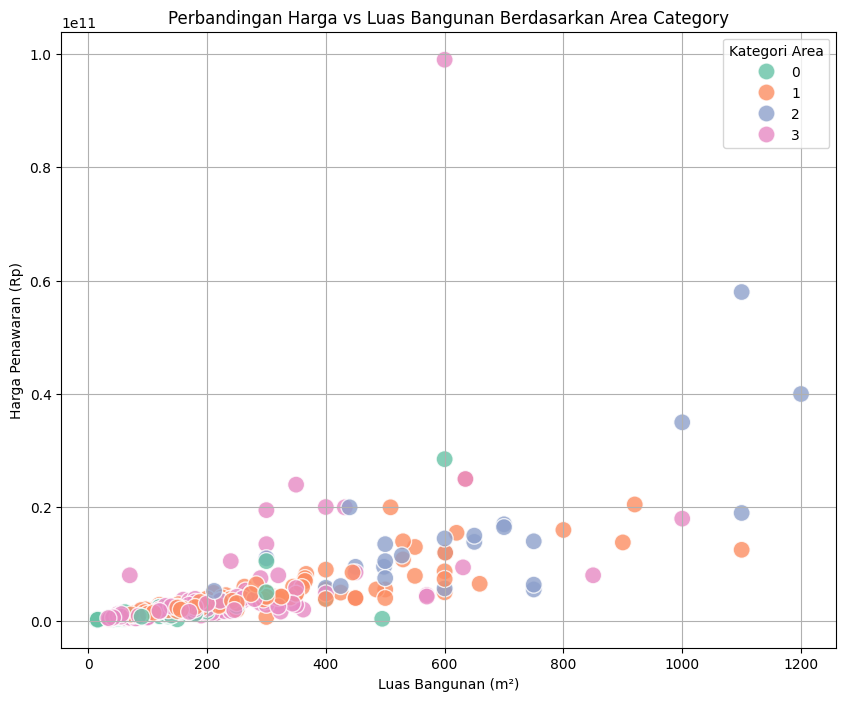

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Luas Bangunan (m2)',
    y='Harga Penawaran (dari Owner)',
    hue='Area Category',
    palette='Set2',
    s=150,
    alpha=0.8
)

plt.title('Perbandingan Harga vs Luas Bangunan Berdasarkan Area Category')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Penawaran (Rp)')
plt.legend(title='Kategori Area')
plt.grid(True)
plt.show()


In [146]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color='Area Category',  
    symbol='Posisi Rumah',  
    size='Jumlah Kamar',   
    title='3D Scatter Plot: Hubungan Luas, Harga, dan Kategori Area',
)

fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(scene=dict(
    xaxis_title='Luas Tanah (m²)',
    yaxis_title='Luas Bangunan (m²)',
    zaxis_title='Harga Penawaran (Rp)'
))

fig.show()


# Comparison & Interpretation
## Statistical Summary for each cluster

In [147]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Area Category': 'first',
    'Nama Daerah': 'first',
    'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Area Category Nama Daerah Luas Tanah (m2)                         \
                 mode        mode            mean         std  min   max   
cluster                                                                    
0                   3          11      225.736156  201.019246   14  1561   
1                   3          30      600.000000         NaN  600   600   

        Luas Bangunan (m2)                         ... Jumlah Kamar      \
                      mean         std  min   max  ...          min max   
cluster                                            ...                    
0               265.602606  212.655015   14  1200  ...            1  13   
1               600.000000         NaN  600   600  ...            7   7   

        Jumlah Kamar Mandi         Harga Penawaran (dari Owner)                \
                      mean min max                         mean           std   
cluster                                                                         
0                 3.332248   1  13                 4.708159e+09  6.351742e+09   
1                 5.000000   5   5                 9.900000e+10           NaN   

                                         
                 min          max count  
cluster                                  
0          160000000  58000000000   307  
1        99000000000  99000000000     1  

[2 rows x 21 columns]

Implikasi Manajerial Berdasarkan Hasil Clustering <br>
## **Cluster 0 (n=307) — Rumah Kelas Menengah, Ukuran Sedang, Harga Terjangkau**

Profil: Rata-rata luas tanah 225 m² dan bangunan 265 m², dengan 3 kamar tidur dan 3 kamar mandi. Harga penawaran sekitar Rp 4,7 miliar.
Mayoritas berada di kategori area Standard, dengan variasi luas yang cukup tinggi.

Makna: Cluster ini mewakili segmen pasar menengah ke atas, yaitu rumah keluarga dengan ukuran sedang dan harga masih relatif terjangkau. Cocok untuk pembeli rumah pertama atau keluarga muda.

Strategi:

*   Fokuskan promosi pada kemudahan akses, lokasi strategis, dan desain fungsional.

*   Tawarkan program KPR ringan atau diskon notaris/biaya balik nama untuk meningkatkan daya tarik.

*   Optimalkan iklan digital dengan filter harga 2–8 miliar.

*   Sertakan tur virtual 3D atau video walkthrough untuk meningkatkan minat calon pembeli.

Fokus KPI: Leads Conversion Rate, Average Selling Price (ASP), dan waktu penjualan rata-rata (Days on Market).

## **Cluster 1 (n=1) — Properti Sangat Premium, Ukuran Besar, Harga Ekstrem**

Profil: Luas tanah 600 m² dan bangunan 600 m², 5 kamar tidur dan 5 kamar mandi. Harga penawaran mencapai Rp 99 miliar. Termasuk kategori area Sangat Premium, kemungkinan berlokasi di kawasan elit seperti Menteng, Pondok Indah, atau Dharmawangsa.

Makna: Cluster ini merepresentasikan pasar eksklusif dan sangat terbatas. Pembeli berasal dari kalangan high-net-worth individuals (HNWI) yang membeli untuk investasi atau gaya hidup mewah.

Strategi:

*   Gunakan strategi penjualan private listing dan by appointment only untuk menjaga eksklusivitas.

*   Promosikan ke komunitas tertutup atau platform properti mewah.

*   Fokus pada branding dan prestige, bukan hanya harga. Tonjolkan fitur seperti arsitektur premium, kolam renang pribadi, dan keamanan 24 jam.

*   Pertimbangkan kolaborasi dengan agen properti khusus segmen luxury.

Fokus KPI: High-Value Transaction Rate, Brand Prestige Index, dan waktu penjualan (target ≤ 6 bulan).

<br><br>
## **Rekomendasi Umum**

Segmentasi Produk:

*   Cluster 0 → Fokus pada rumah keluarga dan hunian menengah.

*   Cluster 1 → Fokus pada properti eksklusif dan investasi jangka panjang.

Strategi Harga & Promosi:

*   Cluster 0 → Gunakan harga kompetitif dengan paket insentif pembelian.

*   Cluster 1 → Terapkan pendekatan value-based pricing dan negosiasi personal.

Strategi Komunikasi:

*   Cluster 0 → Digital marketing massal, media sosial, marketplace properti.

*   Cluster 1 → Networking pribadi, private event, atau media eksklusif.

Monitoring:

*   Evaluasi ulang segmentasi setiap 6 bulan untuk menangkap perubahan tren pasar properti.

*   Amati potensi pergeseran rumah menengah (Cluster 0) menuju pasar premium melalui renovasi atau lokasi berkembang.